In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import listdir

In [2]:
def CreateMasterThetaDF(dirName="."):
    """CreateMasterThetaDF(dirName) where dirName is the directory name of the .theta files,
       output pandas dataframe of all theta files header data and filenames"""
    assert isinstance(dirName, str), "The 'dirName' argument must be a string!"
    fileNames = [dirName+'/'+i for i in listdir(dirName) if i[-6:] == '.theta']
    
    if len(fileNames)==0:
        print("No '.theta' files found in directory '"+dirName+"'.")
        return
    
    D = {"file_name" : []}
    for index,name in enumerate(fileNames):
        f = open(name,'r')
        for i in range(2): colNames = f.readline().split()
        if index == 0:
            for colName in colNames:
                D[colName] = []
        D["file_name"].append(name)
        simParams = f.readline().split()
        for colIndex,colName in enumerate(colNames):
            D[colName].append(float(simParams[colIndex]))
        f.close()
    df = pd.DataFrame(D)
    return df

def CreateThetaDF(fileName):
    """CreateThetaDF(fileName) where fileName is the name of the .theta file,
       output pandas dataframe of .theta histogram data"""
    assert isinstance(fileName, str), "The 'fileName' argument must be a string!"
    try:
        f = open(fileName,'r')
    except:
        print("Failed to open file '" + fileName + "'.")
        return
    
    for i in range(4): colNames = f.readline().split()
    D = {}
    for colName in colNames:
        D[colName] = []
    for line in f:
        line = line.split()
        for colIndex, colName in enumerate(colNames):
            D[colName].append(float(line[colIndex]))
    f.close()
    df = pd.DataFrame(D)
    return df

In [38]:
def CreatePlotsMaster(master_df):
    """TODO"""
    assert isinstance(master_df,pd.DataFrame), "master_df must be pandas DataFrame type"
    
    for i in master_df.index:
        CreateThetaPlot(master_df.iloc[i])
    
def CreateThetaPlot(theta_series):
    """CreateThetaPlot(dataframe) where dataframe is a pandas Series that
    contains the header data for a .theta file (a slice of a theta master dataframe)"""
    
    assert isinstance(theta_series,pd.Series),"theta_series must be pandas Series type"
    if theta_series["n_dim"]!=3:
        print("Dimensionality must be 3D.")
        return
    df=CreateThetaDF(theta_series["file_name"])
    factor = 0.5*len(df.index)*theta_series["n_spec"]/theta_series["n_filaments"]/theta_series["n_steps"]
    for k in range(1,len(df.columns)):
        s = df.iloc[:,k]
        err = pd.Series(np.zeros(len(df.index)))
        for i,j in enumerate(s):
            err[i] = np.sqrt(j)*factor
        s *= factor
        df[df.columns[k]+'_err']=err

    plotEvery=150
    plt.figure(figsize=(5, 5))
    plt.errorbar(df.iloc[:,0][::plotEvery],df.iloc[:,1][::plotEvery],yerr=df['theta_12_err'][::plotEvery], capsize=3)
    lp = theta_series["persistence_length"]
    L = theta_series["length"]
    cl = theta_series["child_length"]
    la = lp/cl
    if la == 0:
        const = 2.0
    else:
        const = 2.0*np.sinh(la)/la
    y = lambda x : np.exp(la*x)/const
    x=np.linspace(-1.0,1.0,1000)
    plt.plot(x,y(x),'r--')
    if theta_series["persistence_length"] == 0:
        plt.ylim(0,1)
    plt.title('Lp = '+str(lp)+", L = "+str(L)+", cL = "+str(cl))
    plt.xlabel(r'cos($\theta$)', fontsize=16)
    plt.ylabel(r'P(cos($\theta$))', fontsize=16)
    legend=plt.legend(["Theory","Simulation"],loc=2, fontsize=10, title=r'$L_p=$'+str(theta_series["persistence_length"]))
    plt.setp(legend.get_title(), fontsize=12)
    plt.tight_layout()
    plt.savefig("conformation_test_l"+str(L)+"_lp"+str(lp)+"_cl"+str(cl)+".png", dpi=300)
    #plt.yscale("Log")
    plt.show()
    plt.close()

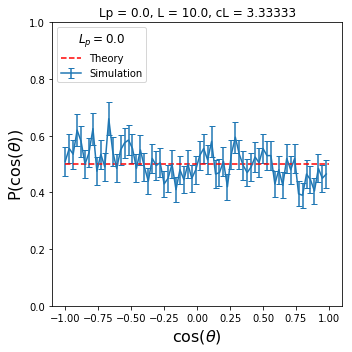

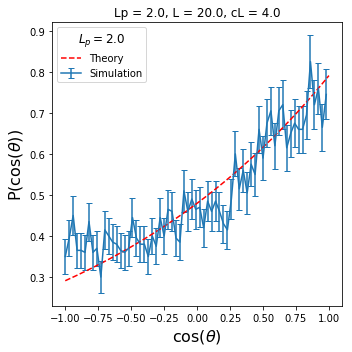

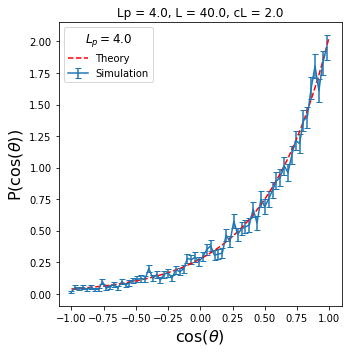

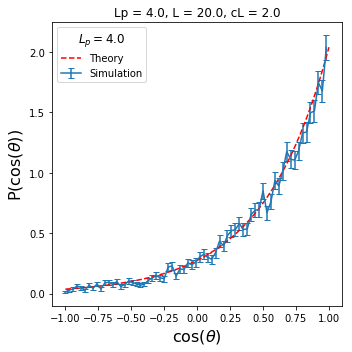

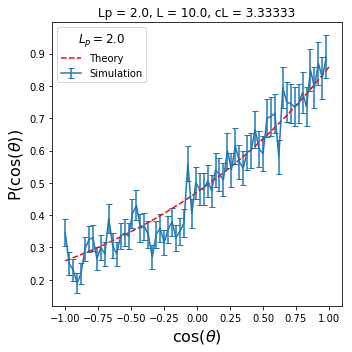

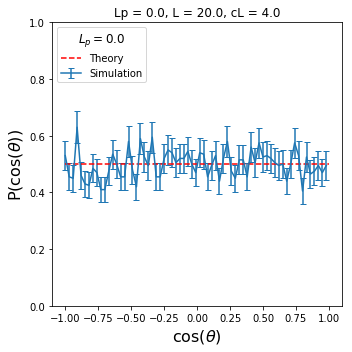

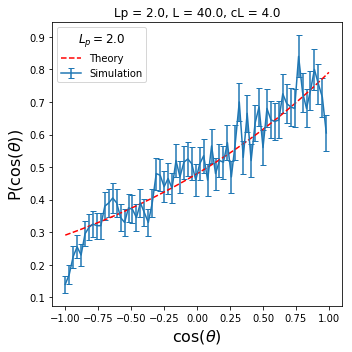

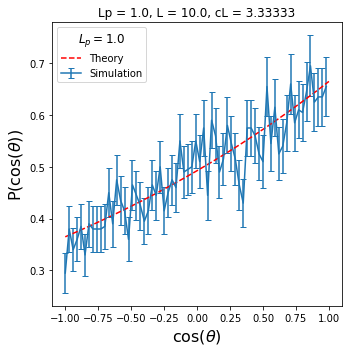

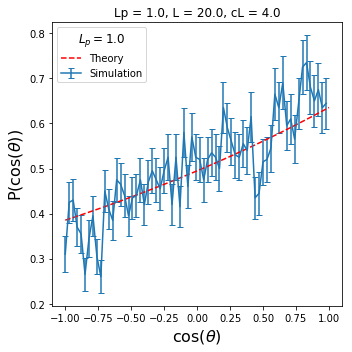

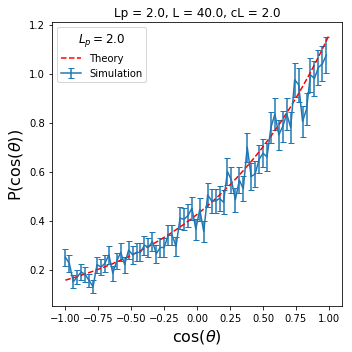

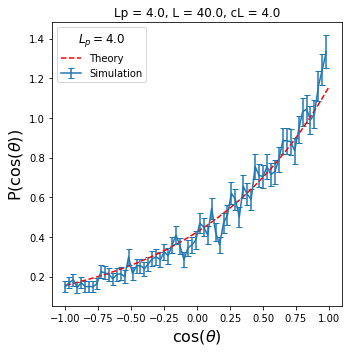

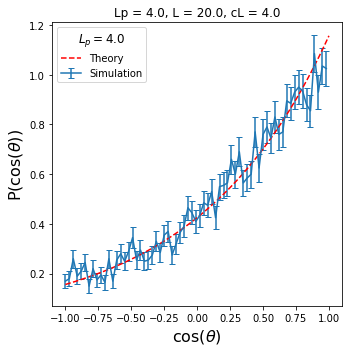

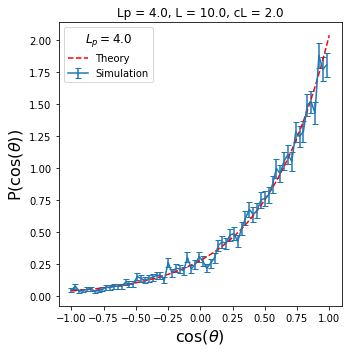

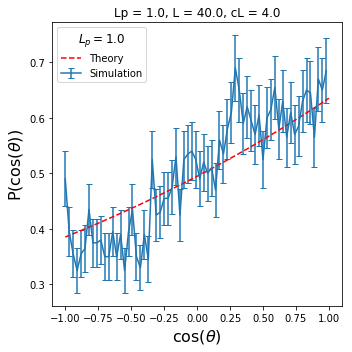

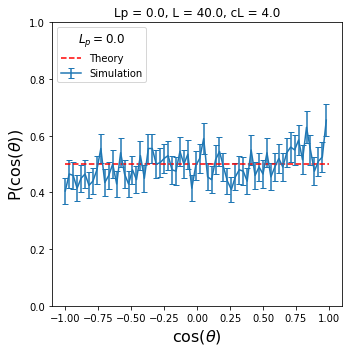

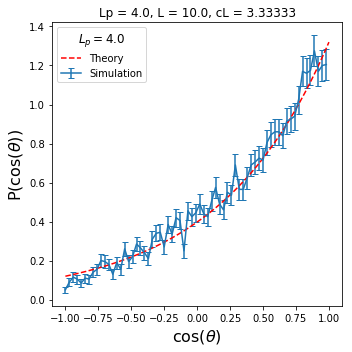

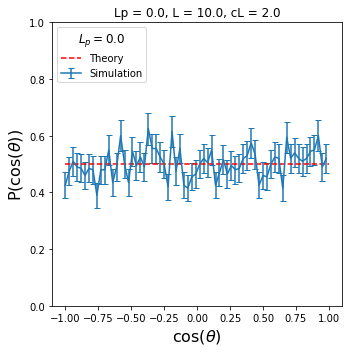

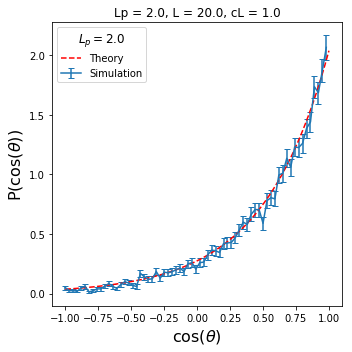

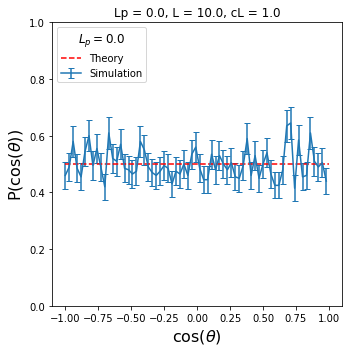

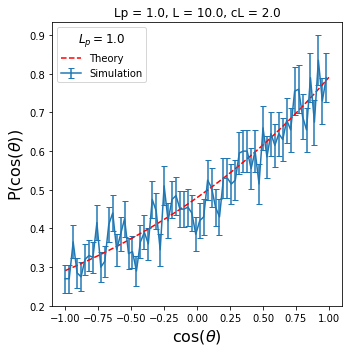

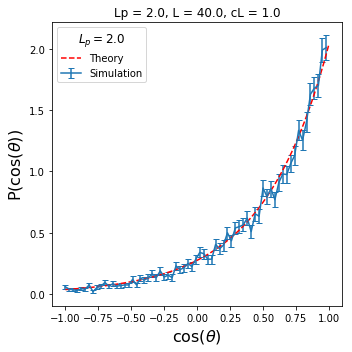

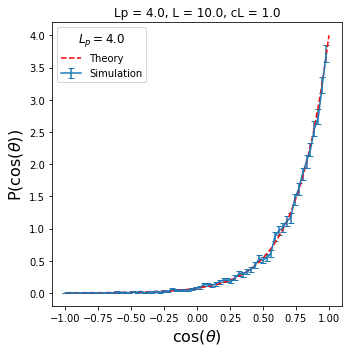

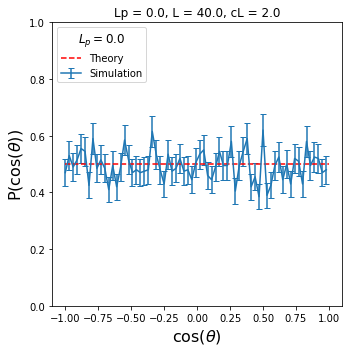

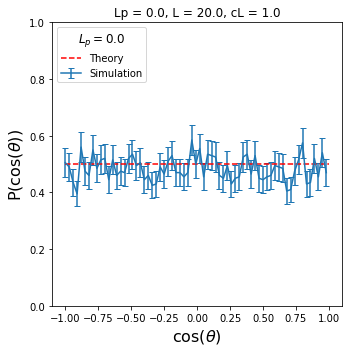

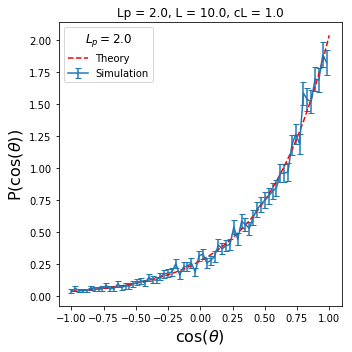

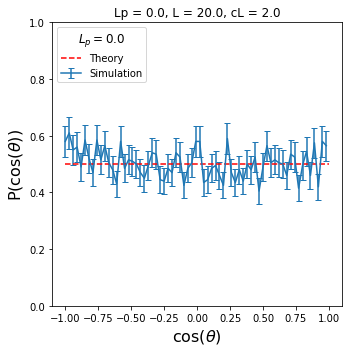

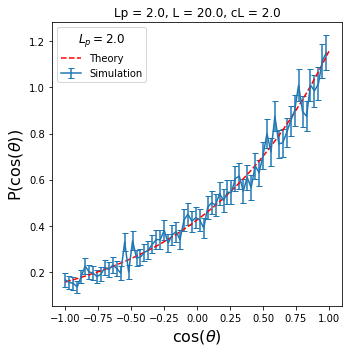

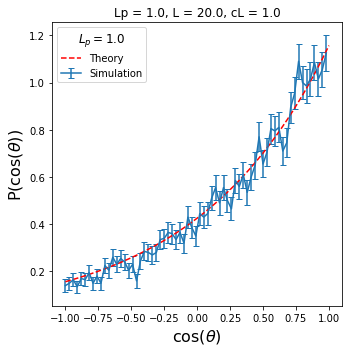

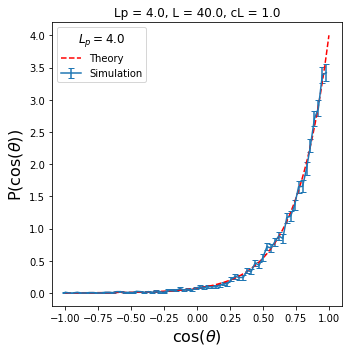

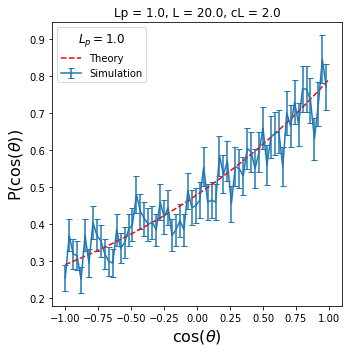

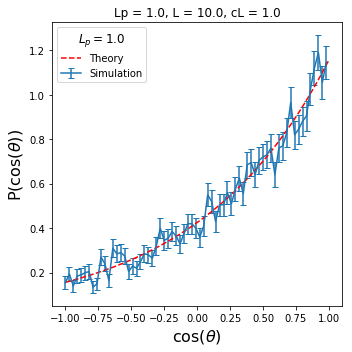

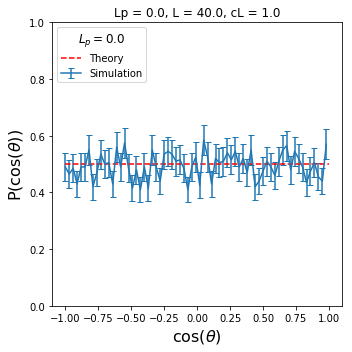

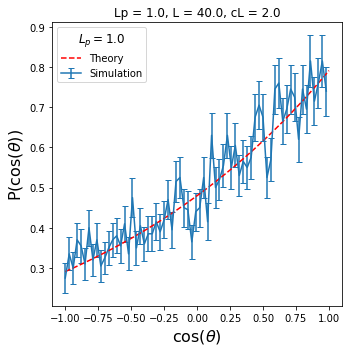

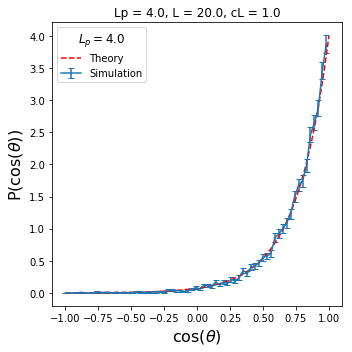

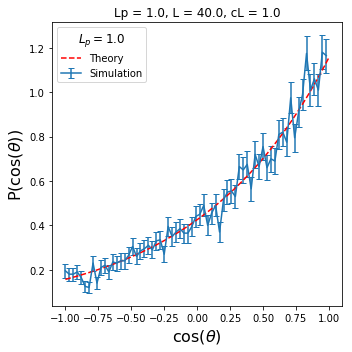

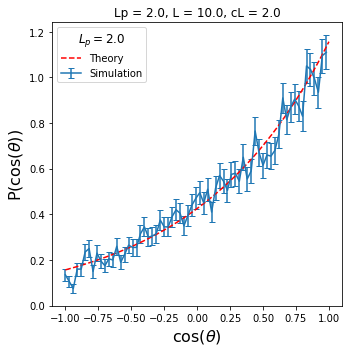

In [39]:
thetaMasterDF = CreateMasterThetaDF('.') # Replace '.' with directory name of .theta files
CreatePlotsMaster(thetaMasterDF)

In [31]:
thetaMasterDF

,file_name,length,child_length,persistence_length,n_filaments,n_bonds,n_steps,n_spec,delta,n_dim,metric_forces
0,./conformation_tests_v024_filament.theta,10.0,3.33333,0.0,100.0,3.0,1000000.0,100.0,0.0001,3.0,1.0
1,./conformation_tests_v031_filament.theta,20.0,4.00000,2.0,100.0,5.0,1000000.0,100.0,0.0001,3.0,1.0
2,./conformation_tests_v023_filament.theta,40.0,2.00000,4.0,100.0,20.0,1000000.0,100.0,0.0001,3.0,1.0
3,./conformation_tests_v022_filament.theta,20.0,2.00000,4.0,100.0,10.0,1000000.0,100.0,0.0001,3.0,1.0
4,./conformation_tests_v030_filament.theta,10.0,3.33333,2.0,100.0,3.0,1000000.0,100.0,0.0001,3.0,1.0
5,./conformation_tests_v025_filament.theta,20.0,4.00000,0.0,100.0,5.0,1000000.0,100.0,0.0001,3.0,1.0
6,./conformation_tests_v032_filament.theta,40.0,4.00000,2.0,100.0,10.0,1000000.0,100.0,0.0001,3.0,1.0
7,./conformation_tests_v027_filament.theta,10.0,3.33333,1.0,100.0,3.0,1000000.0,100.0,0.0001,3.0,1.0
8,./conformation_tests_v028_filament.theta,20.0,4.00000,1.0,100.0,5.0,1000000.0,100.0,0.0001,3.0,1.0
9,./conformation_tests_v020_filament.theta,40.0,2.00000,2.0,100.0,20.0,1000000.0,100.0,0.0001,3.0,1.0
